Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_dup = ducplicated address in 2016-2017  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = housing dataset use for vs interest rate  
interest_rate_1617_df = monthly interest rate from 2016-2017

In [49]:
#import .csv file for question 1 (interest rate vs housing price) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import warnings

housing_data_file = Path('Resources/melb_housing_data.csv')
interest_rate_file = Path('Resources/realestate_interest_rate.csv')
housing_data_df = pd.read_csv(housing_data_file, low_memory=False)
interest_rate_df = pd.read_csv(interest_rate_file)
df = housing_data_df.replace('inf', np.nan)

In [50]:
housing_data_df


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [51]:
#Reduced columns in housing dataset
columns_to_use = ['Suburb', 'Address', 'Regionname', 'Type', 'Date', 'Bedroom','Propertycount', 'Landsize', 'Latitude', 'Longtitude', 'Price']
housing_data_df_reduced = housing_data_df[columns_to_use]

#dropna in Price of housing dataset
housing_data_df_dropna_price = housing_data_df_reduced.dropna(how='any', subset='Price')
housing_data_df2 = housing_data_df_dropna_price
housing_data_df2.isna().sum()


Suburb              0
Address             0
Regionname          0
Type                0
Date                0
Bedroom          6441
Propertycount       3
Landsize         9265
Latitude         6254
Longtitude       6254
Price               0
dtype: int64

In [52]:
#Separate Date into Month and Year columns
warnings.filterwarnings('ignore')
housing_data_df2['Date'] = pd.to_datetime(housing_data_df2['Date'], format='%d/%m/%Y')
housing_data_df2['Month'] = housing_data_df2['Date'].dt.month
housing_data_df2['Year'] = housing_data_df2['Date'].dt.year

#Rearanging columns in housing dataset + sort by Date
housing_data_df2 = housing_data_df2[['Suburb', 'Address', 'Regionname', 'Type', 'Date', 'Year', 'Month', 'Bedroom', 'Propertycount', 'Landsize', 'Latitude', 'Longtitude', 'Price']]
housing_data_df2 = housing_data_df2.sort_values(['Year','Month'],ascending=True).reset_index(drop=True)
housing_data_df2
#housing_data_df2 = Reduced columns, dropna in price, Year:2016-2018, sorted by Date


,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,108.0,-37.82760,145.10230,813000.0
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,490.0,-37.83610,145.10060,1205000.0
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,156.0,-37.80790,144.99340,1035000.0
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,292.0,-37.86870,144.81970,720000.0
4,Ascot Vale,42 Archer Av,Western Metropolitan,h,2016-02-04,2016,2,NaN,6567.0,NaN,NaN,NaN,895000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,134 Gamon St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,597.0,-37.81281,144.88912,1575000.0
27243,Yarraville,3/87 Gamon St,Western Metropolitan,u,2018-03-17,2018,3,NaN,6543.0,NaN,NaN,NaN,525000.0
27244,Yarraville,42 Kingston St,Western Metropolitan,h,2018-03-17,2018,3,2.0,6543.0,188.0,-37.81449,144.88065,939000.0
27245,Yarraville,25 Ovens St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,207.0,-37.81846,144.89216,855000.0


In [53]:
#housing_data_df3 = Year: 2016-2017
housing_data_df3 = housing_data_df2.loc[housing_data_df2['Year']!=2018,:]
housing_data_df3

,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,108.0,-37.82760,145.10230,813000.0
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,490.0,-37.83610,145.10060,1205000.0
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,156.0,-37.80790,144.99340,1035000.0
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,292.0,-37.86870,144.81970,720000.0
4,Ascot Vale,42 Archer Av,Western Metropolitan,h,2016-02-04,2016,2,NaN,6567.0,NaN,NaN,NaN,895000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23568,Wyndham Vale,245 McGrath Rd,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,NaN,-37.89783,144.62831,420000.0
23569,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,613.0,-37.89552,144.61926,415000.0
23570,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,810.0,-37.88318,144.61741,600000.0
23571,Yarraville,36B Goulburn St,Western Metropolitan,h,2017-12-09,2017,12,3.0,6543.0,NaN,-37.81488,144.88922,1160000.0


In [54]:
#finding duplicated Suburb & Address
housing_data_dup = housing_data_df3[['Suburb','Address','Date','Price']]
housing_data_dup = housing_data_dup[housing_data_dup.duplicated(subset=['Suburb','Address'], keep=False)]
housing_data_dup.sort_values(['Suburb','Address']).reset_index(drop=True)

,Suburb,Address,Date,Price
0,Aberfeldie,2 May St,2016-11-19,1200000.0
1,Aberfeldie,2 May St,2017-02-11,1150000.0
2,Aberfeldie,5 Aroona Ct,2016-10-15,1720000.0
3,Aberfeldie,5 Aroona Ct,2017-07-22,1680000.0
4,Airport West,11 Harrington Rd,2016-05-07,725000.0
...,...,...,...,...
451,Yarraville,36B Goulburn St,2017-12-09,1160000.0
452,Yarraville,6/37 Stephen St,2016-08-28,940000.0
453,Yarraville,6/37 Stephen St,2017-10-14,980000.0
454,Yarraville,72 Bishop St,2017-07-01,1240000.0


In [55]:
#dropna in bedroom
housing_data_df4 = housing_data_df3.dropna(how='any', subset='Bedroom')
#Looking at houses with 3 bedrooms only
housing_data_df4 = housing_data_df4.loc[(housing_data_df4['Type']=='h')&(housing_data_df4['Bedroom']==3.0),:].reset_index(drop=True)
housing_data_df4
#housing_data_df4 = looking at 3 bedrooms houses only

,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,490.0,-37.83610,145.10060,1205000.0
1,Bentleigh,11A Mortimore St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,6795.0,299.0,-37.92720,145.04060,1222500.0
2,Burwood,163 Highbury Rd,Southern Metropolitan,h,2016-02-04,2016,2,3.0,5678.0,695.0,-37.85510,145.11210,1151000.0
3,Burwood,30 Station St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,5678.0,931.0,-37.85400,145.11950,1755000.0
4,Coburg,8 Watchtower Rd,Northern Metropolitan,h,2016-02-04,2016,2,3.0,11204.0,142.0,-37.73820,144.97300,675000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,Wyndham Vale,18 Greenwood St,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,567.0,-37.89087,144.62252,425000.0
6740,Wyndham Vale,245 McGrath Rd,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,NaN,-37.89783,144.62831,420000.0
6741,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,613.0,-37.89552,144.61926,415000.0
6742,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,810.0,-37.88318,144.61741,600000.0


In [56]:
#rduced columns to use for comparing interest rate
housing_data_df5 = housing_data_df4[['Suburb', 'Address', 'Regionname', 'Year', 'Month', 'Propertycount', 'Price']]
housing_data_df5
# housing_data_df4 = data use for vs interest rate

,Suburb,Address,Regionname,Year,Month,Propertycount,Price
0,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,2016,1,5457.0,1205000.0
1,Bentleigh,11A Mortimore St,Southern Metropolitan,2016,2,6795.0,1222500.0
2,Burwood,163 Highbury Rd,Southern Metropolitan,2016,2,5678.0,1151000.0
3,Burwood,30 Station St,Southern Metropolitan,2016,2,5678.0,1755000.0
4,Coburg,8 Watchtower Rd,Northern Metropolitan,2016,2,11204.0,675000.0
...,...,...,...,...,...,...,...
6739,Wyndham Vale,18 Greenwood St,Western Metropolitan,2017,12,5262.0,425000.0
6740,Wyndham Vale,245 McGrath Rd,Western Metropolitan,2017,12,5262.0,420000.0
6741,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,2017,12,5262.0,415000.0
6742,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,2017,12,5262.0,600000.0


In [57]:
housing_data_df5['Regionname'].value_counts()

Regionname
Northern Metropolitan         2017
Western Metropolitan          1841
Southern Metropolitan         1549
Eastern Metropolitan           806
South-Eastern Metropolitan     388
Eastern Victoria                50
Northern Victoria               49
Western Victoria                44
Name: count, dtype: int64

In [58]:
interest_rate_df


,country_code,country_name,year,value
0,ABW,Aruba,1987,6.475434
1,ABW,Aruba,1988,6.918180
2,ABW,Aruba,1989,6.264234
3,ABW,Aruba,1990,4.566641
4,ABW,Aruba,1991,4.791125
...,...,...,...,...
4571,ZWE,Zimbabwe,2017,3.742846
4572,ZWE,Zimbabwe,2018,-64.380817
4573,ZWE,Zimbabwe,2019,-64.295151
4574,ZWE,Zimbabwe,2020,-81.132121


In [59]:
#Cleaning up Interest Rate dataset to look at Australia only. 
interest_rate_df['country_name']=interest_rate_df['country_name'].astype(str)
interest_rate_aus_df = interest_rate_df.loc[interest_rate_df['country_name']=='Australia',:].reset_index(drop=True)
interest_rate_aus_year_df = interest_rate_aus_df.loc[interest_rate_aus_df['year']>2015,:].reset_index(drop=True)
interest_rate_aus_year_df


,country_code,country_name,year,value
0,AUS,Australia,2016,6.062701
1,AUS,Australia,2017,1.448037
2,AUS,Australia,2018,3.370036
3,AUS,Australia,2019,1.647306


In [60]:
#Interpolate monthly interest rates from 2016-2017 & 2017-2018
interest_2016 = interest_rate_aus_year_df.iloc[0,3]
interest_2017 = interest_rate_aus_year_df.iloc[1,3]
interest_2018 = interest_rate_aus_year_df.iloc[2,3]
interest_2016_avg = (interest_2017-interest_2016)/12
interest_2017_avg = (interest_2018-interest_2017)/12
monthly_interest_rate_2016 = np.arange (interest_2016, interest_2017, interest_2016_avg).tolist()
monthly_interest_rate_2017 = np.arange (interest_2017, interest_2018, interest_2017_avg).tolist()

#Combining lists to generate new DataFrame for interest rates of 2016-2017
list_2016 = [2016]*12
list_2017 = [2017]*12
list_year = list_2016 + list_2017
list_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
list_months = list_months*2
interest_rates_1617 = monthly_interest_rate_2016 + monthly_interest_rate_2017
interest_rate_dict = {'Years' : list_year,
                      'Months' : list_months,
                      'Interest Rate' : interest_rates_1617}
interest_rate_1617_df = pd.DataFrame(interest_rate_dict)
interest_rate_1617_df

,Years,Months,Interest Rate
0,2016,Jan,6.062701
1,2016,Feb,5.678146
2,2016,Mar,5.293590
3,2016,Apr,4.909035
4,2016,May,4.524480
5,2016,Jun,4.139924
6,2016,Jul,3.755369
7,2016,Aug,3.370814
8,2016,Sep,2.986259
9,2016,Oct,2.601703


Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_dup = ducplicated address in 2016-2017  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = dataset use for Question 1 (vs interest rate)  
interest_rate_1617_df = monthly interest rate from 2016-2017
housing_data_location = dataset use for Question 2 (vs location)

In [61]:
#created new daraset for Question 2
housing_data_location = housing_data_df4
housing_data_location

,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,490.0,-37.83610,145.10060,1205000.0
1,Bentleigh,11A Mortimore St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,6795.0,299.0,-37.92720,145.04060,1222500.0
2,Burwood,163 Highbury Rd,Southern Metropolitan,h,2016-02-04,2016,2,3.0,5678.0,695.0,-37.85510,145.11210,1151000.0
3,Burwood,30 Station St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,5678.0,931.0,-37.85400,145.11950,1755000.0
4,Coburg,8 Watchtower Rd,Northern Metropolitan,h,2016-02-04,2016,2,3.0,11204.0,142.0,-37.73820,144.97300,675000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,Wyndham Vale,18 Greenwood St,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,567.0,-37.89087,144.62252,425000.0
6740,Wyndham Vale,245 McGrath Rd,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,NaN,-37.89783,144.62831,420000.0
6741,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,613.0,-37.89552,144.61926,415000.0
6742,Wyndham Vale,19 Whitmore Pl,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,810.0,-37.88318,144.61741,600000.0


In [62]:
#Grouped data to Suburb + data for 2017 only, ranked by price to find most expensive and cheapest. 
housing_data_loc_group = pd.DataFrame(housing_data_location[['Suburb', 'Year','Latitude', 'Longtitude', 'Price']].groupby([ 'Suburb', 'Year']).mean()).reset_index()
housing_data_loc_group = housing_data_loc_group.loc[housing_data_loc_group['Year']==2017,:]
round(housing_data_loc_group.sort_values('Price', ascending=False),2)



,Suburb,Year,Latitude,Longtitude,Price
397,Toorak,2017,-37.84,145.01,2607857.14
265,Malvern,2017,-37.86,145.03,2390000.00
152,East Melbourne,2017,-37.81,144.99,2362500.00
279,Middle Park,2017,-37.85,144.96,2352166.67
321,Parkville,2017,-37.79,144.96,2271666.67
...,...,...,...,...,...
274,Melton South,2017,-37.71,144.57,418577.59
275,Melton West,2017,-37.68,144.56,416700.00
273,Melton,2017,-37.68,144.57,404590.91
32,Bacchus Marsh,2017,-37.67,144.43,382333.33


In [63]:
# Question 2- Optimal real estate investment 
housing_data_df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [64]:
## Replace 'inf' string with np.nan for proper calculations (Dropping infinite values from dataframes in pandas) following code was used in Dependancies    
df = df.replace('inf', np.nan)

In [65]:
# Convert columns to appropriate data types
for col in ['BuildingArea', 'YearBuilt']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define a function to normalize columns (0 to 1 scale)
def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())

In [66]:
# Define a basic scoring function based on available criteria
def score_dataframe(df):
    # Normalize columns
    for feature in ['Distance', 'Rooms', 'Bedroom', 'Bathroom', 'Car', 'Landsize']:
        df[feature] = normalize_column(df[feature])

    # Calculate and normalize building area
    df['BuildingArea'] = normalize_column(df['BuildingArea'])

    # Calculate building age and normalize
    current_year = pd.to_datetime('today').year
    df['BuildingAge'] = current_year - df['YearBuilt']
    df['BuildingAge'] = normalize_column(df['BuildingAge'])

    # Inverse normalize Propertycount as less is presumed to be better
    df['Propertycount'] = 1 - normalize_column(df['Propertycount'])
    
    # Assign weights to each feature based on presumed importance
    weights = {
        'Distance': -1,
        'Rooms': 1,
        'Bedroom': 1,
        'Bathroom': 1,
        'Car': 1,
        'Landsize': 1,
        'BuildingArea': 1,
        'BuildingAge': -0.5,
        'Propertycount': 1
    }

    # Calculate weighted score
    df['Score'] = (df['Distance'] * weights['Distance'] +
                   df['Rooms'] * weights['Rooms'] +
                   df['Bedroom'] * weights['Bedroom'] +
                   df['Bathroom'] * weights['Bathroom'] +
                   df['Car'] * weights['Car'] +
                   df['Landsize'] * weights['Landsize'] +
                   df['BuildingArea'] * weights['BuildingArea'] +
                   df['BuildingAge'] * weights['BuildingAge'] +
                   df['Propertycount'] * weights['Propertycount'])

    return df

# Apply the scoring function to the dataframe
scored_df = score_dataframe(df)

In [67]:
# Group by suburb and calculate mean score for each suburb
suburb_scores = scored_df.groupby('Suburb')['Score'].mean().reset_index()

# Find the top 5 suburbs with the highest average score
top_suburbs = suburb_scores.sort_values(by='Score', ascending=False).head(5)

# Find the suburbs with the lowest average score
worst_suburbs = suburb_scores.sort_values(by='Score').head(5)

(top_suburbs, worst_suburbs)

(             Suburb     Score
 281        Seaholme  1.431839
 104        Deepdene  1.389774
 196         Kooyong  1.346691
 72   Caulfield East  1.275638
 129   Essendon West  1.268799,
         Suburb     Score
 252   Pakenham -0.313313
 142  Frankston -0.163255
 33     Berwick  0.036554
 265  Reservoir  0.075755
 298    Sunbury  0.135681)

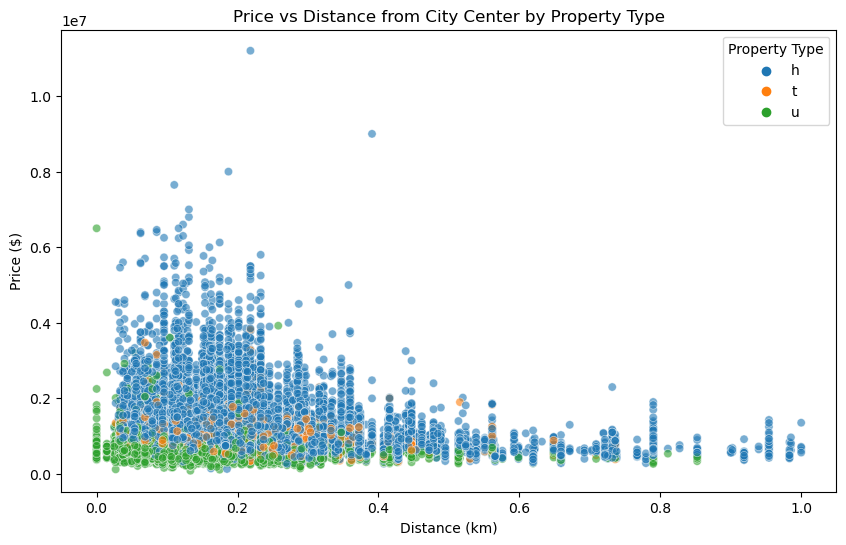

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot of Price vs Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scored_df, x='Distance', y='Price', hue='Type', alpha=0.6)
plt.title('Price vs Distance from City Center by Property Type')
plt.xlabel('Distance (km)')
plt.ylabel('Price ($)')
plt.legend(title='Property Type')
plt.show()

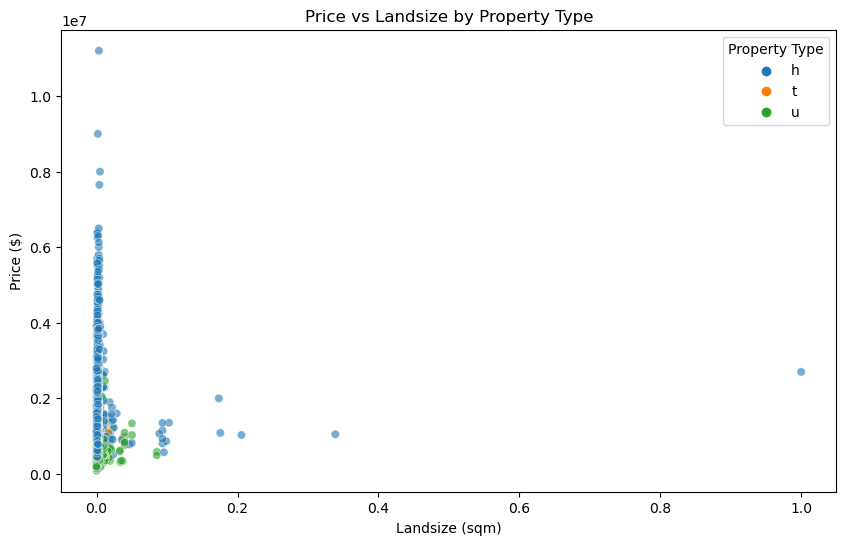

In [69]:
# Scatter plot of Price vs Landsize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scored_df, x='Landsize', y='Price', hue='Type', alpha=0.6)
plt.title('Price vs Landsize by Property Type')
plt.xlabel('Landsize (sqm)')
plt.ylabel('Price ($)')
plt.legend(title='Property Type')
plt.show()


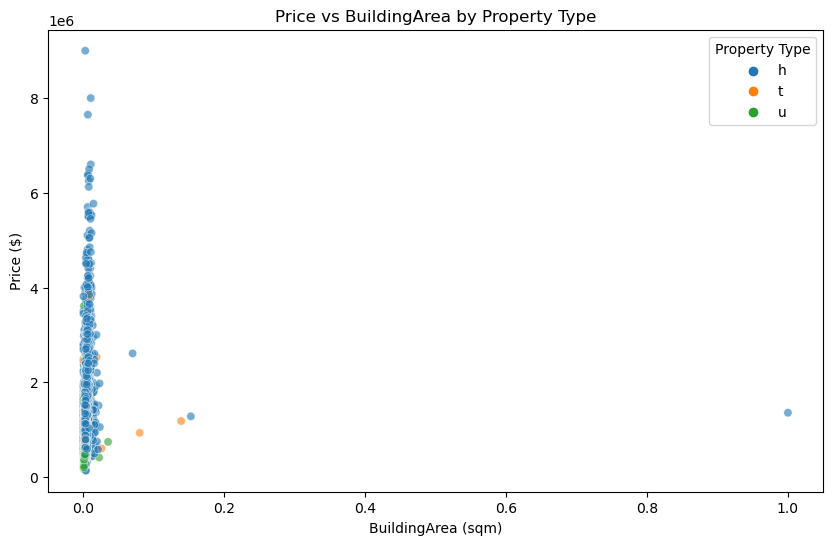

In [70]:
# Scatter plot of Price vs BuildingArea
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scored_df, x='BuildingArea', y='Price', hue='Type', alpha=0.6)
plt.title('Price vs BuildingArea by Property Type')
plt.xlabel('BuildingArea (sqm)')
plt.ylabel('Price ($)')
plt.legend(title='Property Type')
plt.show()

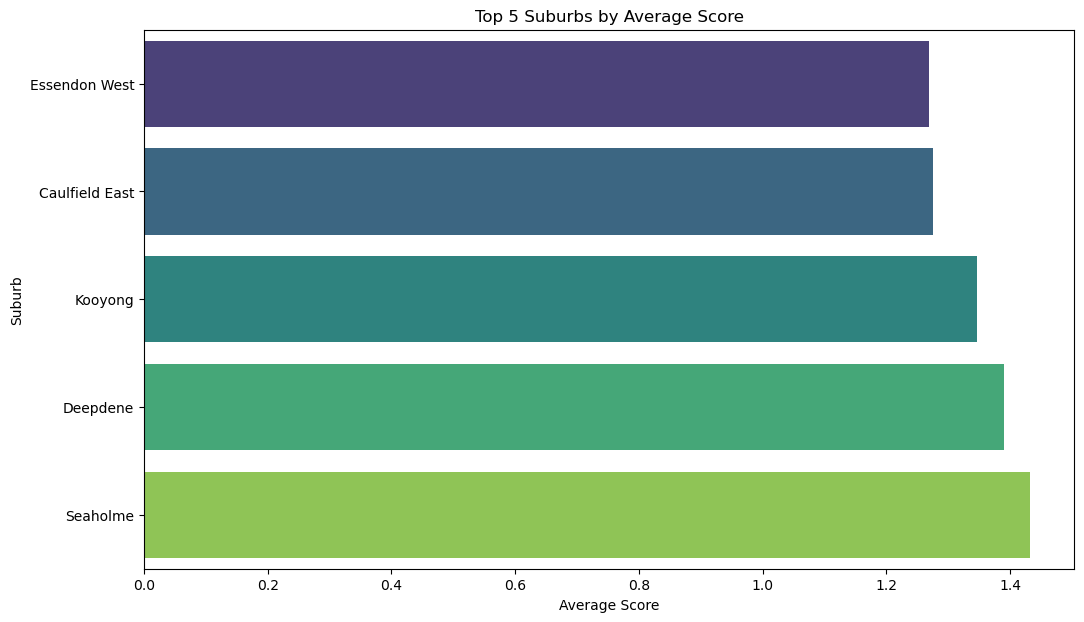

In [71]:
# Use the suburb_scores for the bar plots

# Bar plot for top suburbs
plt.figure(figsize=(12, 7))
top_suburbs_sorted = top_suburbs.sort_values('Score', ascending=True)
sns.barplot(x='Score', y='Suburb', data=top_suburbs_sorted, palette='viridis')
plt.title('Top 5 Suburbs by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Suburb')
plt.show()

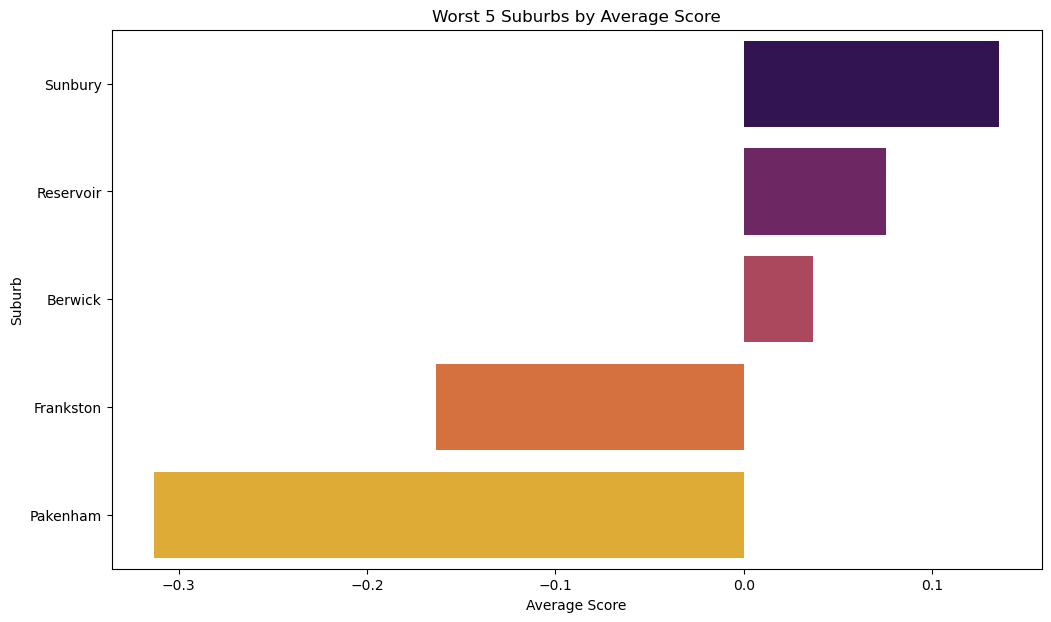

In [72]:
# Bar plot for worst suburbs
plt.figure(figsize=(12, 7))
worst_suburbs_sorted = worst_suburbs.sort_values('Score', ascending=False)
sns.barplot(x='Score', y='Suburb', data=worst_suburbs_sorted, palette='inferno')
plt.title('Worst 5 Suburbs by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Suburb')
plt.show()
